# **Text Classification and Clustering With Machine Learning and NLP(Natural Language Processing):**
Text classification is the process of classifying unstructured text data into various category such as technology, sport,medical,math etc.


Most of the information are unstructured because of the messy nature of text, this is where text classification with machine learning comes in.


Text classification with machine learning, natural language processing (NLP), and other AI-guided techniques help to classify text in a faster, more cost-effective, and more accurate manner.

**Machine Learning Text Classification Algorithms::**

* Most popular text classification algorithms include  K-Means algorithm,Naive Bayes family of algorithms, Support vector machines (SVM), and Deep learning.

* In this tutorial i am going to use **K-Means algorithm** to classify and clustering the given text data.

**Reason of machine learning text classification:**

* Manually analyzing and organizing is slow and much less accurate. Machine learning can automatically analyze millions of data in a few minutes.

* Machine learning text classification based on real-time analysis.



**Text Classification Examples:**

* **Sentiment Analysis:**Sentiment analysis allows you to automatically analyze all forms of text for the feeling and emotion of the writer.

* **Topic Labeling:**
Another common example of text classification is topic labeling, that is, understanding what a given text is talking about.

* **Language Detection:**
Language detection is another great example of text classification, that is, the process of classifying incoming text according to its language.

* **Intent Detection:**
Intent detection or intent classification is another great use case for text classification that analyzes text to understand the reason behind feedback. Maybe it’s a complaint, or maybe a customer is expressing intent to purchase a product.


**Text Classification Applications & Use Cases:**


Some of the top applications and use cases of text classification include:

* Automate business processes

* Email spam filtering

* Detecting urgent issues

* Automating customer support processes

* Listening to the Voice of customer (VoC)

* Phising and nonphising classification



#**Text classification using K-means Clustering Algorithm:**

Clustering is an unsupervised learning technique which means that it has no labeled data and grouping a set of object having similar feature to each other.One of the most popular an simple clustering algorithms is k-means clustering algorithm.


K-Means is one of the simplest unsupervised clustering algorithm which is used to cluster our data into K number of clusters. The algorithm iteratively assigns the data points to one of the K clusters based on how near the point is to the cluster centroid.

 The result of K-Means algorithm is:

(a)K number of cluster centroids

(b)Data points classified into the clusters



**Mathematics behind K-Mean Clustering algorithm:**


Assuming we have input data points $x_{0}$, $x_{1}$, $x_{2}$, $x_{3}$ ,…,$x_{n}$ and $y_{0}$, $y_{1}$, $xy_{2}$, $y_{3}$,..….$y_{n}$,and value of K (the number of clusters needed).

We follow the below procedure:

(1)Pick K points as the initial centroids from the dataset,either randomly or the first K.

(2)Find the Euclidean distance(ED) of each point in the dataset with the identified K points (cluster centroids).

(3)Calculate Euclidean(ED) distance for k1 and k2 and the lower value of k1 or k2 belong same class(eg.ED of point k1=20.80 and ED of point k2=4.48 ,since value of k2 is lower distance and closest so this class belongs to k2 clusters).

(4)Assign each data point to the closest centroid using the distance found in the previous step.

(5)Find the new centroid by taking the average of the points in each cluster group.

(6)Repeat 2 to 4 for a fixed number of iteration or till the centroids don’t change.

**Euclidean Distance between two points in space:**

 Euclidean Distance(ED)=$\sqrt{(x_0-x_c)^2+(y_0-y_c)^2}$


where,

$x_{0}$ and $y_{0}$ are giver data of class.

$x_{c}$ and $y_{c}$ are centroyed of x point and y point respectively.









**The data set used is obtained from kaggle data sets and the link is here:**

www.kaggle.com









#**Import Essential libraries:**

In [1]:
from google.colab import drive          #mount your Google Drive in your virtual machine(VM).
drive.mount('/gdrive')                  #Access  the data of colab note to drive because of different server of colab and drive. 

Mounted at /gdrive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import sklearn

In [3]:
dataset=pd.read_csv('/gdrive/My Drive/ML Project /Text Classification and Clustering/abcnews-date-text.csv',quoting=3) 
                                             #Read data file with path location

In [4]:
dataset.head() #Show top 5 data point head.



,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226258 entries, 0 to 1226257
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   publish_date   1226258 non-null  int64 
 1   headline_text  1226258 non-null  object
dtypes: int64(1), object(1)
memory usage: 18.7+ MB


In [6]:
#Duplicate dataset
dataset[dataset['headline_text'].duplicated(keep=False)].sort_values('headline_text').head(8)

,publish_date,headline_text
57967,20031129,10 killed in pakistan bus crash
116298,20040920,10 killed in pakistan bus crash
676423,20120302,110 with barry nicholls
672958,20120217,110 with barry nicholls
911080,20141023,110 with barry nicholls
748629,20121214,110 with barry nicholls
826828,20131017,110 with barry nicholls episode 15
897042,20140820,110 with barry nicholls episode 15


In [7]:
#Deleting duplicate dataset
dataset = dataset.drop_duplicates('headline_text')



#**Data Cleaning:**

* In this stage we have to remove all the insignificant words in the observation such as **stop words**(eg. etc).In this case there is a library provided by **nltk (natural language tool kit)**.

* **NLTK** is a powerful Python package that provides a set of diverse natural languages algorithms. It is free, opensource, easy to use, large community, and well documented. NLTK consists of the most common algorithms such as tokenizing, part-of-speech tagging, stemming, sentiment analysis, topic segmentation, and named entity recognition. 

* **NLTK** helps the computer to analysis, preprocess, and understand the written text.



* **A Regular Expression (RE)** in a programming language is a special text string used for describing a search pattern. It is extremely useful for extracting information from text such as code, files, log, spreadsheets or even documents.

* **Stopwords** provides multiple sources of stopwords, for use in text analysis and natural language processing.





In [8]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True



###**Stemming:**

* Stemming is also good practice as it involves reducing a word to its root form. For example **Flying** is a word and its **suffix** is **ing**, if we remove **ing** from **Flying** then we will get **base word or root** word which is **“Fly”.**

* **Tokenization** is the process by which a large quantity of text is divided into smaller parts called tokens. These tokens are very useful for finding patterns and are considered as a base step for stemming.

* **Tokenizers** divide strings into lists of substrings.






In [9]:
from nltk.stem.porter import PorterStemmer           #The program reduce a word to its root form.
from nltk.corpus import stopwords                    #The  program removes stop words from a piece of text.
from nltk.tokenize import word_tokenize              #Tokenizers divide strings into lists of substrings.



In [10]:
ps=PorterStemmer()                                  #Creat a variable and store PorterStemmer into it.


In [14]:
#Description of this code is written below in details.
stemmed_dataset=[]                               
for i in range(0,1000):
    stemmed_array = dataset["headline_text"][i].split() 
    stemmed = [ps.stem(word) for word in stemmed_array if not word in set(stopwords.words("english"))]
    stemmed = " ".join(stemmed)
    stemmed_dataset.append(stemmed)
    
    
print(stemmed_dataset[0:5])

['aba decid commun broadcast licenc', 'act fire wit must awar defam', 'g call infrastructur protect summit', 'air nz staff aust strike pay rise', 'air nz strike affect australian travel']



* Above it involves a code which specifies the range which is 0 to 1226257 records. 

* I then initialized the variable stemmed_array to be equal to a column ‘headline_text’ which is to be clustered. 

* The split function ensures that the sentence is broken down into a list of words.
*  The words are then stemmed by calling the object ‘ps’ from the function PorterStemmer and the word stemmed must not be in the stop word list.
*  Then the list of words is then joined back together using the join() function. 
* The sentence is now appended to the blank data set list that was initialized before the stemming process.



#**Create a Vector:**



* The next step is to **create a vector** of all the words.This is now **tokenization** which is the process of taking each of the words in the observations and making a column for each.

* **CountVectorizer** is a great tool provided by the **scikit-learn library in Python**. It is used to transform a given text into a vector on the basis of the **frequency (count)** of each word that occurs in the entire text. This is helpful when we have multiple such texts, and we wish to convert each word in each text into vectors (for using in further text analysis).

* **CountVectorizer** creates a matrix in which each unique word is represented by a column of the matrix, and each text sample from the document is a row in the matrix. The value of each cell is nothing but the count of the word in that particular text sample. 


* **Note:**

 Since we have a **text string(headline_text)** data, so transform a given text into a vector for **ploatting a scatter and Clustering**.

 **If data  are in the form of numerical values then this step not required, we have to apply directly on values.**





In [15]:
from sklearn.feature_extraction.text import  CountVectorizer   #transform a given text into a vector 


In [16]:
cv=CountVectorizer()
X=cv.fit_transform(stemmed_dataset)







#**K-means algorithm applied:**

* Finally we can have the k-means algorithm applied to the vectorized data set. This is simply done as shown below:

* In the **Elbow method**, we are actually varying the number of clusters ( K ) from 1 – 10. For each value of K, we are calculating **WCSS ( Within-Cluster Sum of Square )**. WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph starts to move almost parallel to the X-axis. The K value corresponding to this point is the optimal K value or an optimal number of clusters.


* The number of clusters that we choose for a given dataset cannot be random. Each cluster is formed by calculating and comparing the distances of data points within a cluster to its centroid. An ideal way to figure out the right number of clusters would be to calculate the Within-Cluster-Sum-of-Squares (WCSS). WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids.

* WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids.

* **“init”** argument is the method for initializing the centroid. We calculated the WCSS value for each K value.

* **n_init default=10**,
Number of time the k-means algorithm will be run with different centroid seeds.

* **max_iter, default=300**,
Maximum number of iterations of the k-means algorithm for a single run.







In [34]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss=[]
for i in range(1, 11):
   kmeans= KMeans(n_clusters= i, init="k-means++", max_iter=300,n_init=10,random_state=0,verbose=True) #Parameters
   y_kmeans=kmeans.fit_predict(X)
   #appending the WCSS to the list (kmeans.inertia_ returns the WCSS value for an initialized cluster)
   wcss.append(kmeans.inertia_) 



Initialization complete
Iteration 0, inertia 11195.0.
Iteration 1, inertia 5279.977000000001.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 9291.0.
Iteration 1, inertia 5279.977000000001.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 10235.0.
Iteration 1, inertia 5279.977000000001.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 9289.0.
Iteration 1, inertia 5279.977000000001.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 11211.0.
Iteration 1, inertia 5279.977000000001.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 11165.0.
Iteration 1, inertia 5279.977000000001.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 11285.0.
Iteration 1, inertia 5279.977000000001.
Converged at iteration 1: strict convergence.
Initialization complet

In [35]:
#now visualization of the plot
import matplotlib.pyplot as plt

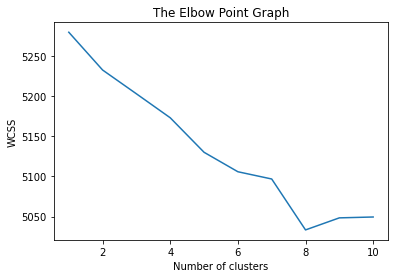

In [36]:
#Plotting The Elbow graph
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#**Fitting K-Means to the dataset:**

* From the **Elbow point graph** we analyze the graph we can see that the graph will rapidly change at a point and thus creating an **elbow shape**. From this point, the graph starts to **move almost parallel to the X-axis**. The K value corresponding to this point is the **optimal K value or an optimal number of clusters**.

* But in above **Elbow graph** graph not show proper elbow so we consider first change line point  k value is optimal number of clusters.

* So the **optimal  number of clusters is 4  .**

* Now let’s train the model on the dataset with a number of clusters 4. 

In [37]:
##Fitting K-Means to the dataset
true_k=4                          #number of clusters
model=KMeans(n_clusters=true_k, init="k-means++",max_iter=300, n_init=10)
model.fit(X)




KMeans(n_clusters=4)

#**Top Terms Per Cluster:**

* Print top terms per cluster.
* We can give name of cluster manually as per feature of cluster.

In [38]:
#print top terms per cluster
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:,::-1]
terms = cv.get_feature_names()
for i in range(true_k):
  print("Cluster %d:" %i,)
  for ind in order_centroids[i,:10]:
     print("%s" % terms[ind])
  print   

Top terms per cluster:
Cluster 0:
man
us
plan
fire
polic
court
call
win
nsw
govt
Cluster 1:
council
report
offer
welcom
day
turkey
ta
administr
appoint
harass
Cluster 2:
rain
claim
price
drought
reject
may
break
water
high
petrol
Cluster 3:
iraq
us
un
war
soon
inspect
wheat
british
expect
weapon


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#**Prediction:**
Finally we can predict to identify the cluster a data point belongs to.


In [40]:
Y= cv.transform(["what victorias coronavirus restrictions mean "])
prediction=model.predict(Y)
print(prediction)


[0]


#**Scatter Plot:**
* Let us now draw a scatter plot to see how our data seems in clusters.

* As per the documentation of **matplotlib.pyplot.scatter** takes an **array** as in **input** but in our case **X[y_kmeans == a,b]** we are **feeding in a sparse matrix**, so we need to **convert it into an numpy array using .toarray() method**. 



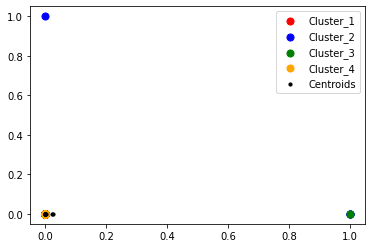

In [42]:
plt.scatter(X[y_kmeans == 0,0].toarray(), X[y_kmeans==0,1].toarray(), s = 50, c= 'red', label = 'Cluster_1')
plt.scatter(X[y_kmeans == 1,0].toarray(), X[y_kmeans==1,1].toarray(), s = 50, c= 'blue', label = 'Cluster_2')
plt.scatter(X[y_kmeans == 2,0].toarray(), X[y_kmeans==2,1].toarray(), s = 50, c= 'green', label = 'Cluster_3')
plt.scatter(X[y_kmeans == 3,0].toarray(), X[y_kmeans==3,1].toarray(), s = 50, c= 'orange', label = 'Cluster_4')


plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=10, c = 'Black', label ='Centroids')
plt.legend() 
plt.show()


#**Conclusion:**
This is all about the basic concept of the K-Means Clustering algorithm in Machine Learning.

Finally our text classification model done and now we can predict to identify the cluster a  text data point belongs to.
